In [299]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [300]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [301]:
def GetLaguerre(n,x):
    
    if n==0:
        LN=1
    elif n==1:
        LN=(1-x)
    else:    
        LN = ((2*n-1-x)*GetLaguerre(n-1,x)-(n-1)*GetLaguerre(n-2,x))/n
    return LN


In [302]:
print (GetLaguerre(2,x))

(1 - x)*(3 - x)/2 - 1/2


In [303]:
def GetDLeguerre(n,x):
    Pn = GetLaguerre(n,x)
    return sym.diff(Pn,x,1)

In [304]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [305]:
def GetRoots(f,df,x,tolerancia = 10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [306]:
def GetAllRootsGLeg(n):

    xn = np.linspace(0,n+(n-1)*np.sqrt(n),100)
    
    Leguerre = []
    DLeguerre = []
    
    for i in range(n+1):
        Leguerre.append(GetLaguerre(i,x))
        DLeguerre.append(GetDLeguerre(i,x))
    
    poly = sym.lambdify([x],Leguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLeguerre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots

In [307]:
print (GetAllRootsGLeg(2))

[0.58578644 3.41421356]


In [308]:
def GetWeightsGLag(n):
    Roots = GetAllRootsGLeg(n)
    Dleguerre=[]
    for i in range(n+1):
        Dleguerre.append(GetDLeguerre(i,x))
    
    Dpoly = sym.lambdify([x],Dleguerre[n],'numpy')
    Weights = Roots/(((n+1)**2)*(GetLaguerre(n+1,Roots)**2))
    
    return Weights

In [309]:
raices = GetAllRootsGLeg(8)
pesos = GetWeightsGLag(8)
funcion = lambda x: np.cos(x)
I = 0
for i in range(8):
    I += pesos[i]*funcion(raices[i])


In [310]:
I

0.5000012064816967

1. a partir te la sustitucion obtenemos que:

In [311]:
M=1
    #peso molecular g/mol
R=8.314472
    #R en J/mol*K
T = sym.Symbol('T',real=True)
    #para distintas temperaturas
v= sym.Symbol('v',real=True)
    #velocidades 
u=(M*(v**2))/(2*R*T)

In [312]:
#(2/raiz de pi)*integral de 0 a infinito de e**(-u)*np.sqrt(u)*du 
j=2/np.sqrt(np.pi)
fun = lambda x: np.sqrt(x)
g = 0
for i in range(8):
    g += pesos[i]*fun(raices[i])

G=j*g
print (G)

1.0051681875388532


C:\Users\DIEGOM~1\AppData\Local\Temp/ipykernel_13840/2033340780.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  return (4/(v*np.sqrt(np.pi))*(((M*(v**2))/(2*R*T))**(3/2))*(np.e**(-((M*(v**2))/(2*R*T)))))
C:\Users\DIEGOM~1\AppData\Local\Temp/ipykernel_13840/2033340780.py:13: RuntimeWarning: invalid value encountered in double_scalars
  return (4/(v*np.sqrt(np.pi))*(((M*(v**2))/(2*R*T))**(3/2))*(np.e**(-((M*(v**2))/(2*R*T)))))


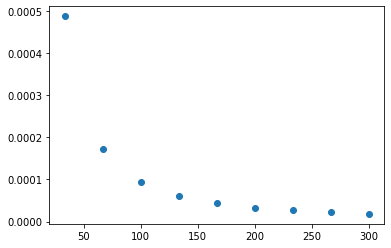

In [313]:
M=2
    #masa en kg
R=8.314472
    #R en J/mol*K
T = sym.Symbol('T',real=True)
    #para distintas temperaturas
v= sym.Symbol('v',real=True)
    #velocidades 
x=(M*(v**2))/(2*R*T)

Tn=np.linspace(0,300,10)
def pv (v,T):
    return (4/(v*np.sqrt(np.pi))*(((M*(v**2))/(2*R*T))**(3/2))*(np.e**(-((M*(v**2))/(2*R*T)))))

listapvs=[]
for i in range(0,len(Tn)):
    o=pv(1,Tn[i])
    listapvs.append(o)

l=(plt.scatter(Tn,listapvs))
print (l)
    



A medidad que la temperatura aumente y la velocidad se mantiene constante la Probabilidad disminuye por tanto al analizar la grafica la cual tiene mayor P(v) vemos que tiene mayor aquella la cual tiene menor temperatura.

3. para 10 temperaturas encuentre la v promedio:
- a partir de la sustitucion obtenemos

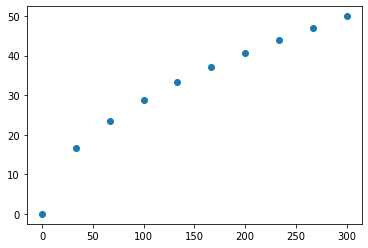

In [314]:
C=((2*R*T)/M)**(1/2)
fu = lambda x: x
g = 0
for i in range(8):
    g += pesos[i]*fu(raices[i])

c=C*g
c

def velovidad_promedio(T,g):
    C=((2*R*T)/M)**(1/2)
    c=C*g
    return c

Vprom=[]
Tnn=np.linspace(0,300,10)
for i in range(0,len(Tnn)):
    o=velovidad_promedio(Tnn[i],g)
    Vprom.append(o)

k=plt.scatter(Tnn,Vprom)
k
    


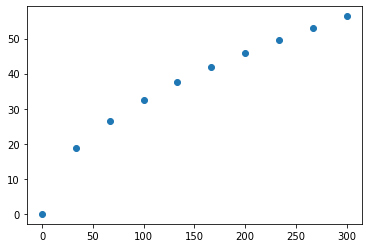

In [315]:
Tnnn=np.linspace(0,300,10)
yes=[]
for i in range(0,len(Tnnn)):
    y=np.sqrt((8*R*Tnn[i])/(np.pi*M))
    yes.append(y)

h=plt.scatter(Tnnn,yes)
h

4. veocidad media cuadratica

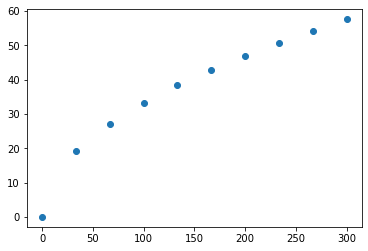

In [316]:
ñ=(2*R*T)/M
fñ= lambda x: x**(3/2)
z = 0
for i in range(8):
    z += pesos[i]*fñ(raices[i])

def velovidad_media(T,z):
    ñ=(2*R*T)/M
    c=ñ*z
    return np.sqrt(c)

Tss=np.linspace(0,300,10)
yss=[]
for i in range(0,len(Tss)):
    y=velovidad_media(Tss[i],z)
    yss.append(y)

d=plt.scatter(Tss,yss)
d

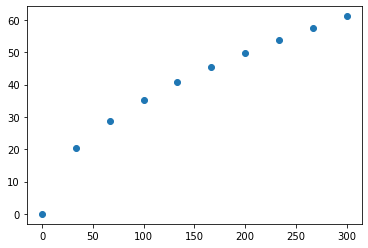

In [317]:
Ts=np.linspace(0,300,10)
ys=[]
for i in range(0,len(Ts)):
    y=np.sqrt((3*R*Ts[i])/M)
    ys.append(y)

h=plt.scatter(Ts,ys)
h

5. 1/2 m vrms**2 = 3/2 n R T

tenemos que m3RT/2M entonces m/M = numero de moles (n)

entonces obtenemos 3/2 nRT